In [144]:
import urllib.request
import ssl
from bs4 import BeautifulSoup
import pandas as pd


In [146]:
# Create an SSL context to bypass verification
context = ssl._create_unverified_context()

# Wikipedia URL
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

# Fetch the HTML content
response = urllib.request.urlopen(url, context=context)
html = response.read()

html

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of largest companies in the United States by revenue - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector

In [148]:
# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

In [150]:
# Find the table that I need from the page
soup.find('table', class_='wikitable sortable')

table = soup.find_all('table')[0]

print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [152]:
# Extract table headers
headers = [header.text.strip() for header in table.find_all('th')]

headers

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [154]:
# Extract table rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip header row
    columns = row.find_all('td')
    if columns:
        rows.append([col.text.strip() for col in columns])

rows

[['1',
  'Walmart',
  'Retail',
  '648,125',
  '6.0%',
  '2,100,000',
  'Bentonville, Arkansas'],
 ['2',
  'Amazon',
  'Retail and cloud computing',
  '574,785',
  '11.9%',
  '1,525,000',
  'Seattle, Washington'],
 ['3',
  'Apple',
  'Electronics industry',
  '383,482',
  '-2.8%',
  '161,000',
  'Cupertino, California'],
 ['4',
  'UnitedHealth Group',
  'Healthcare',
  '371,622',
  '14.6%',
  '440,000',
  'Minnetonka, Minnesota'],
 ['5',
  'Berkshire Hathaway',
  'Conglomerate',
  '364,482',
  '20.7%',
  '396,500',
  'Omaha, Nebraska'],
 ['6',
  'CVS Health',
  'Healthcare',
  '357,776',
  '10.9%',
  '259,500',
  'Woonsocket, Rhode Island'],
 ['7',
  'ExxonMobil',
  'Petroleum industry',
  '344,582',
  '-16.7%',
  '61,500',
  'Spring, Texas'],
 ['8',
  'Alphabet',
  'Technology and cloud computing',
  '307,394',
  '8.7%',
  '182,502',
  'Mountain View, California'],
 ['9',
  'McKesson Corporation',
  'Health',
  '276,711',
  '4.8%',
  '48,000',
  'Irving, Texas'],
 ['10',
  'Cencora',


In [156]:
# Create a DataFrame
df = pd.DataFrame(rows, columns=headers)

df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [158]:
# Convert column names to a list
headers = df.columns.tolist()
print(headers)


['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [214]:
# Import libraries for visuals

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np


In [162]:
# Convert all values to string first, then remove commas
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].astype(str).str.replace(',', '', regex=True)

# Convert to numeric, forcing errors to NaN
df['Revenue (USD millions)'] = pd.to_numeric(df['Revenue (USD millions)'], errors='coerce')


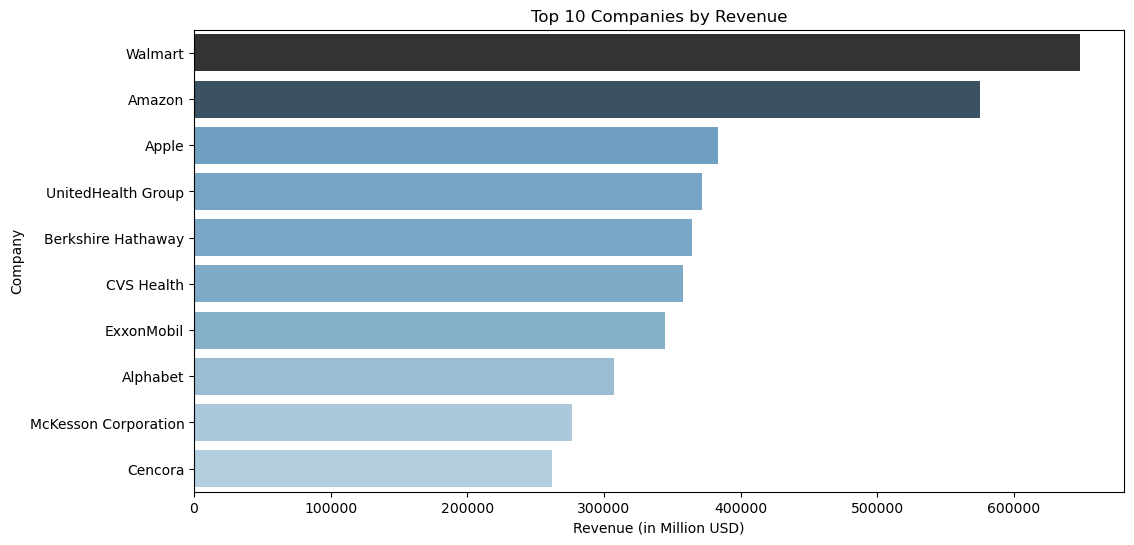

In [174]:
# Top 10 companies by revenue

top_10 = df.nlargest(10, 'Revenue (USD millions)')

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Revenue (USD millions)', 
    y='Name', 
    data=top_10, 
    hue='Revenue (USD millions)',  # Assign x variable to hue
    palette='Blues_d', 
    legend=False  # Disable the legend to match previous behavior
)

plt.title('Top 10 Companies by Revenue')
plt.xlabel('Revenue (in Million USD)')
plt.ylabel('Company')
plt.show()


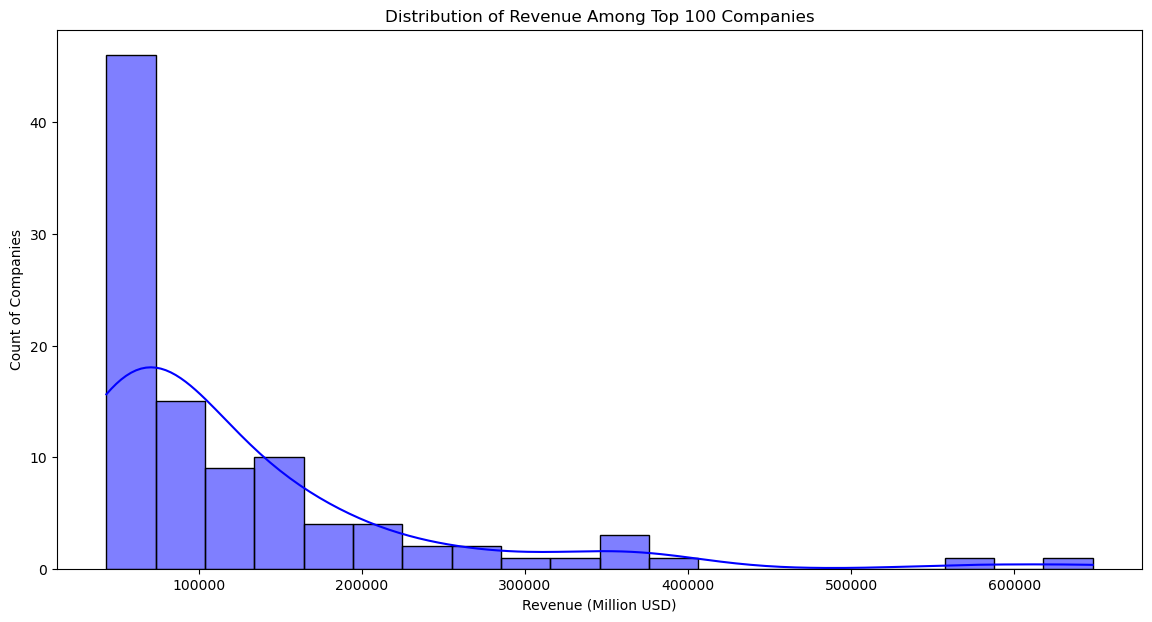

In [285]:
# Revenue Distribution of Top 100 Companies

plt.figure(figsize=(14, 7))
sns.histplot(df['Revenue (USD millions)'], bins=20, kde=True, color='blue')
plt.title('Distribution of Revenue Among Top 100 Companies')
plt.xlabel('Revenue (Million USD)')
plt.ylabel('Count of Companies')
plt.show()


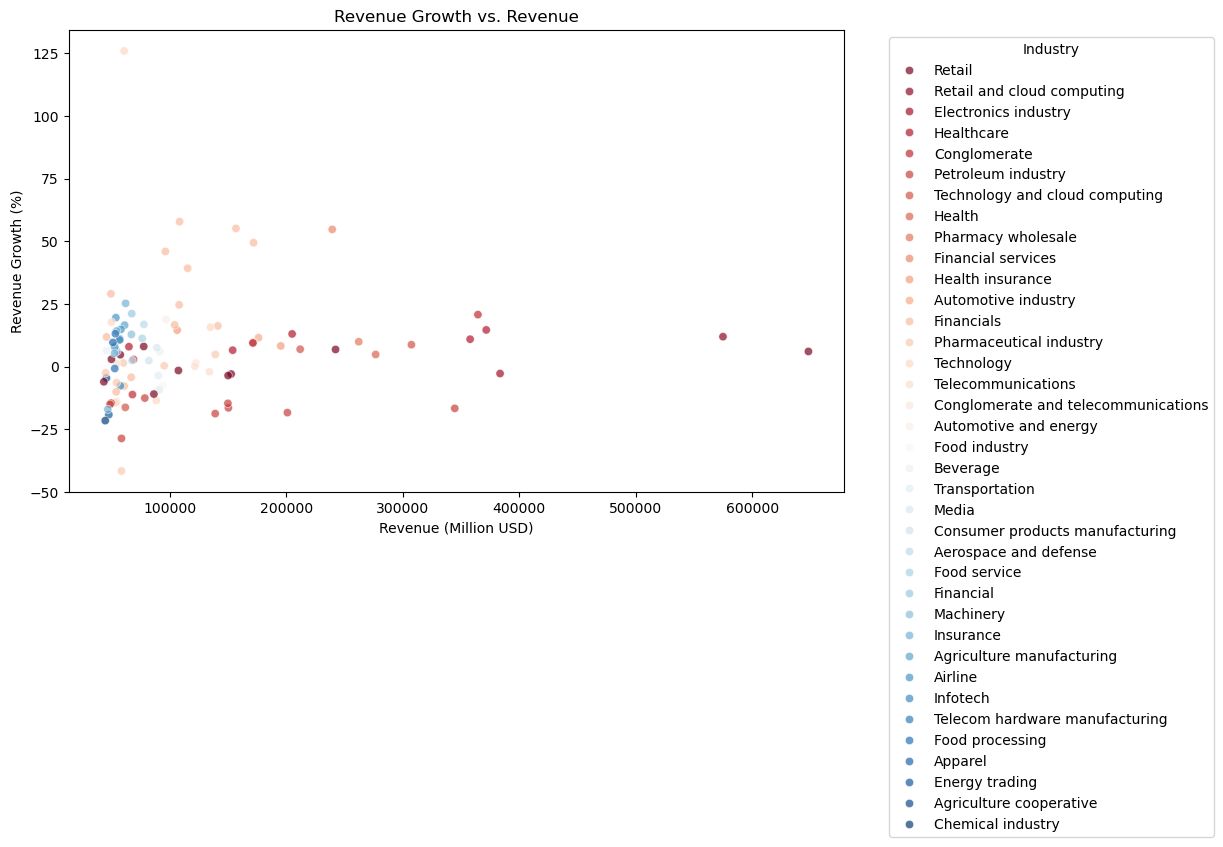

In [253]:
# Revenue Growth vs Revenue

#df['Revenue growth'] = df['Revenue growth'].str.rstrip('%').astype(float)  # Convert to numeric

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Revenue (USD millions)', y='Revenue growth', data=df, hue='Industry', palette='RdBu', alpha=0.7)
plt.title('Revenue Growth vs. Revenue')
plt.xlabel('Revenue (Million USD)')
plt.ylabel('Revenue Growth (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Industry")

plt.show()


C:\Users\Mario\AppData\Local\Temp\ipykernel_63460\754415532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Industry'], order=df['Industry'].value_counts().index, palette='viridis')


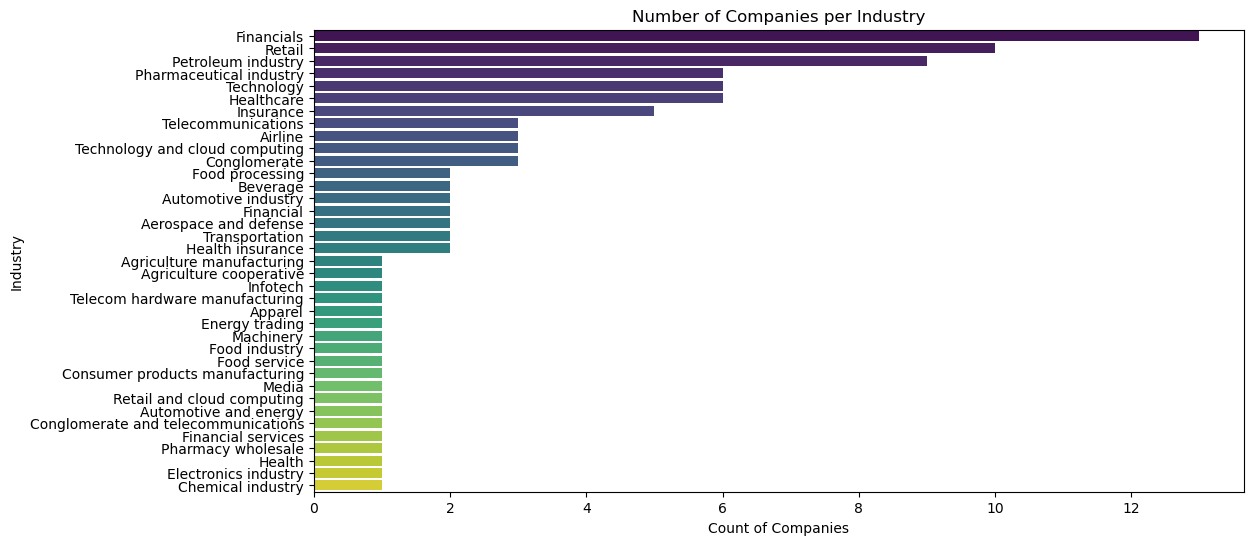

In [251]:
#  Industries with the Highest Representation

plt.figure(figsize=(12, 6))
sns.countplot(y=df['Industry'], order=df['Industry'].value_counts().index, palette='viridis')
plt.title('Number of Companies per Industry')
plt.xlabel('Count of Companies')
plt.ylabel('Industry')
plt.show()


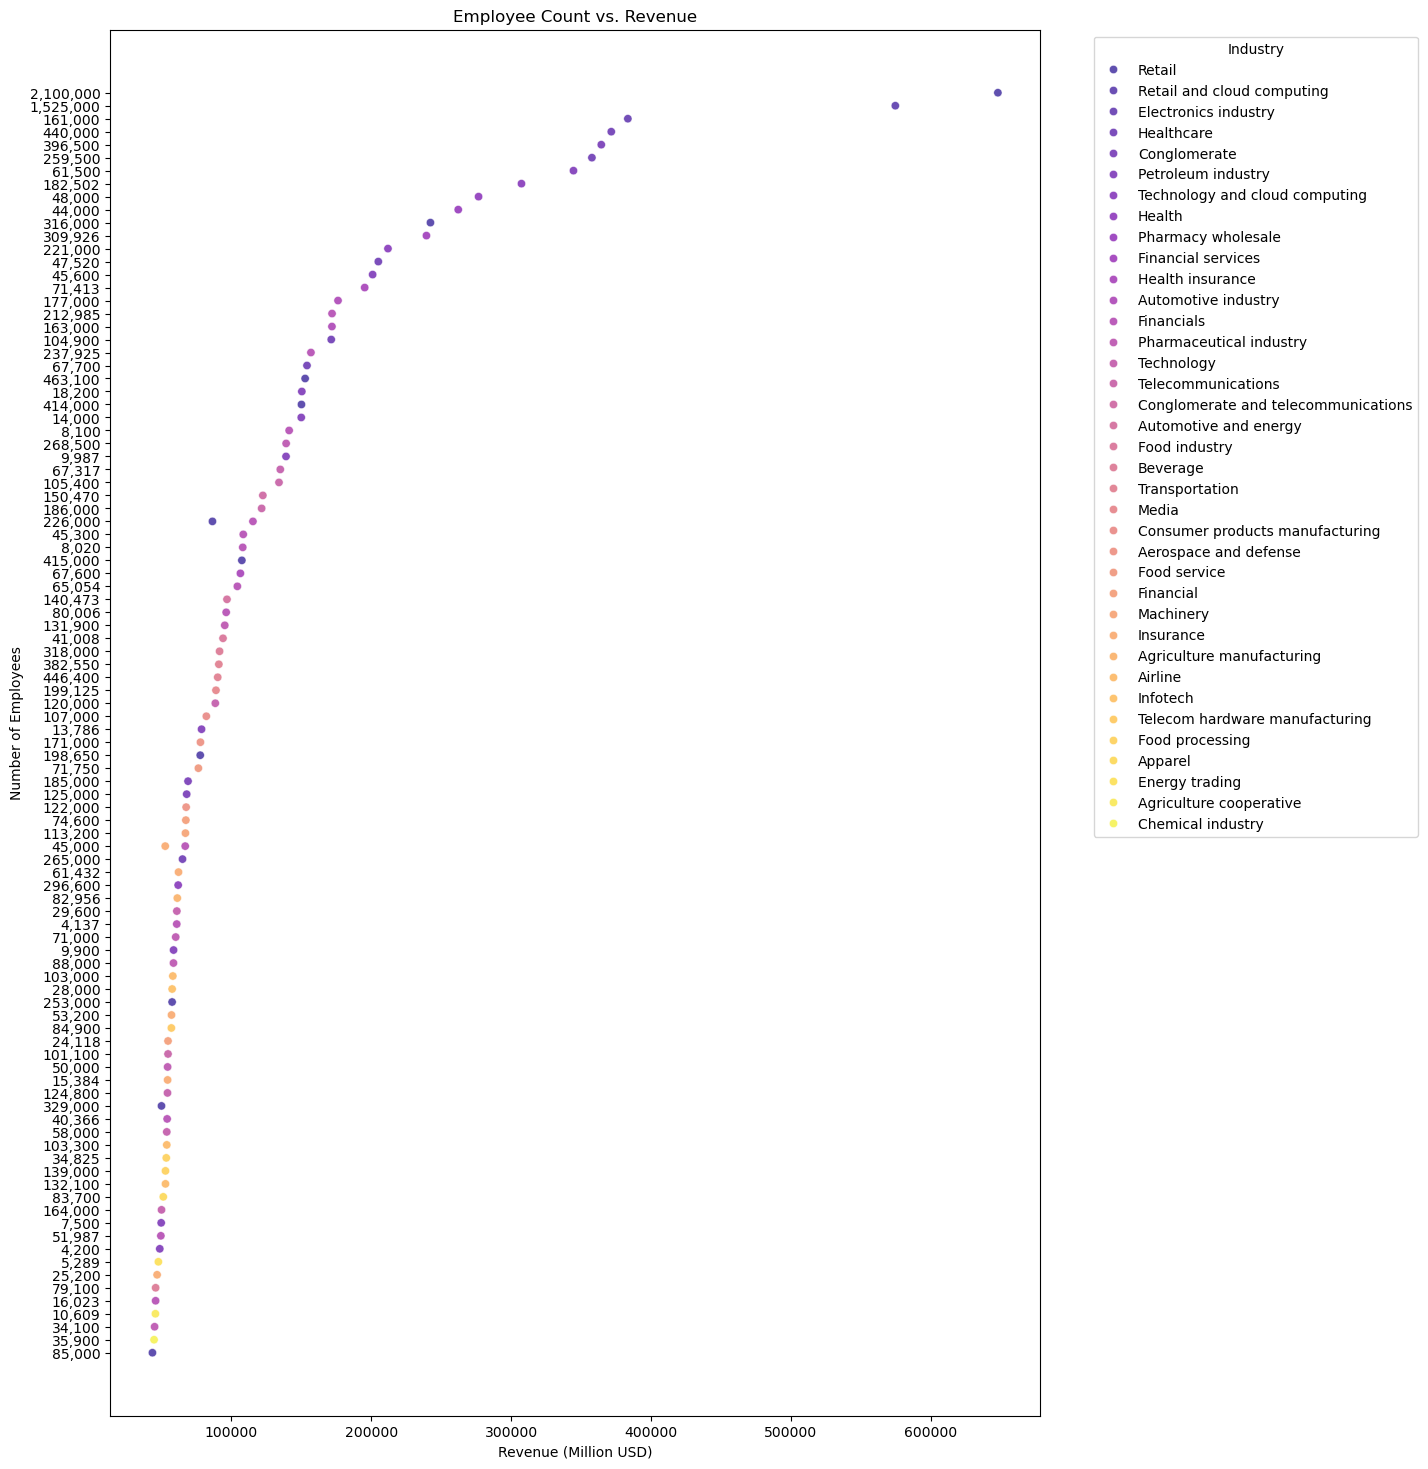

In [277]:
# Employee Count vs Revenue

plt.figure(figsize=(12, 18))
sns.scatterplot(x='Revenue (USD millions)', y='Employees', data=df, hue='Industry', palette='plasma', alpha=0.7)
plt.title('Employee Count vs. Revenue')
plt.xlabel('Revenue (Million USD)')
plt.ylabel('Number of Employees')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Industry")
plt.show()


C:\Users\Mario\AppData\Local\Temp\ipykernel_63460\3103820296.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['State'], order=df['State'].value_counts().index, palette='magma')


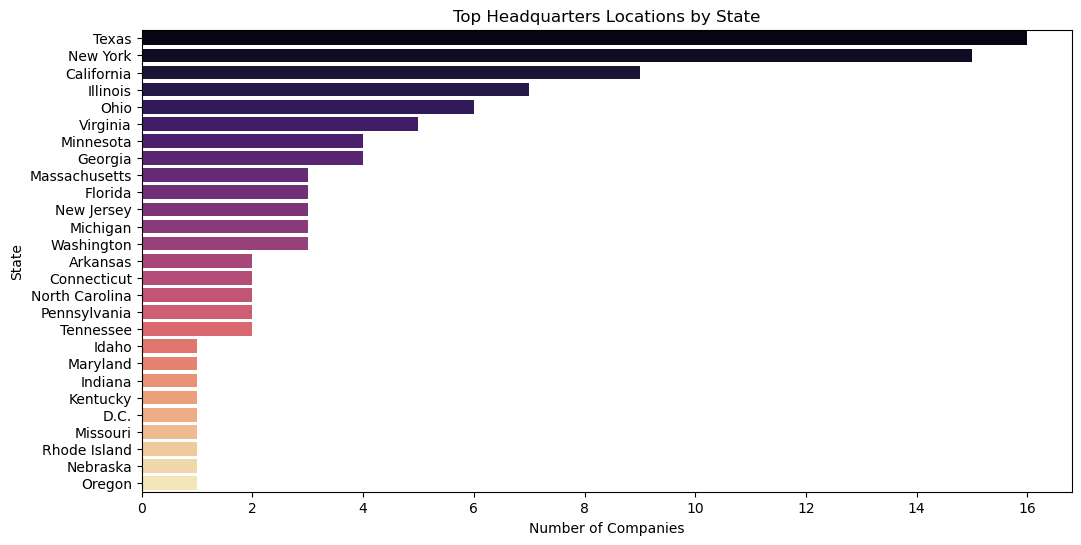

In [279]:
# Headquarters Location Frequency

plt.figure(figsize=(12, 6))
df['State'] = df['Headquarters'].apply(lambda x: x.split(',')[-1].strip())  # Extract state
sns.countplot(y=df['State'], order=df['State'].value_counts().index, palette='magma')
plt.title('Top Headquarters Locations by State')
plt.xlabel('Number of Companies')
plt.ylabel('State')
plt.show()


C:\Users\Mario\AppData\Local\Temp\ipykernel_63460\3589853300.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue growth', y='Name', data=negative_growth, palette='Reds_r')


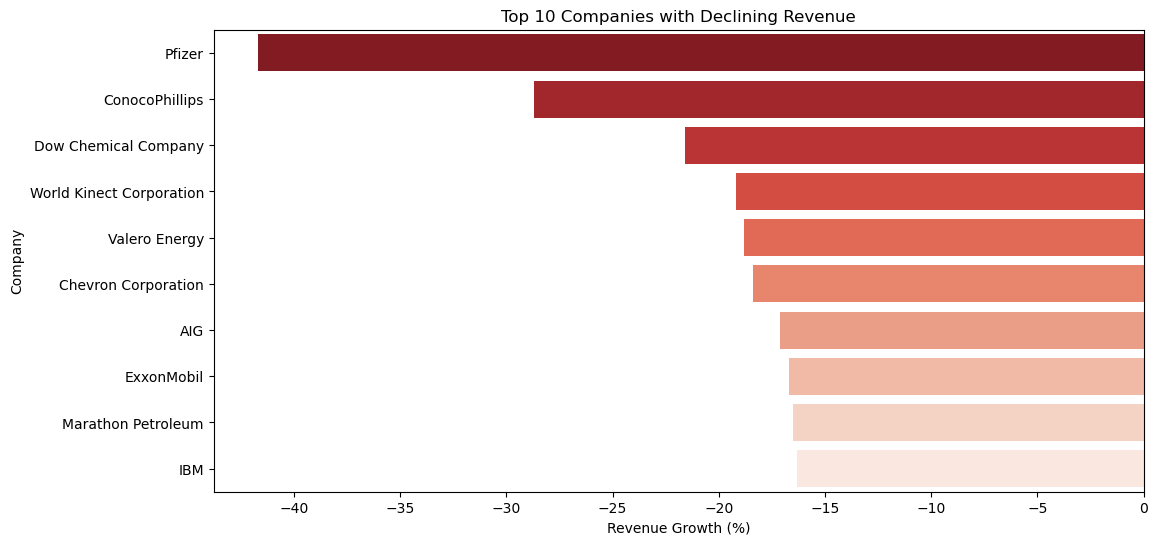

In [281]:
#  Companies with Negative Revenue Growth

negative_growth = df[df['Revenue growth'] < 0].nsmallest(10, 'Revenue growth')

plt.figure(figsize=(12, 6))
sns.barplot(x='Revenue growth', y='Name', data=negative_growth, palette='Reds_r')
plt.title('Top 10 Companies with Declining Revenue')
plt.xlabel('Revenue Growth (%)')
plt.ylabel('Company')
plt.show()
